In [42]:
%matplotlib inline

import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread("images/rotated.png")

In [36]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [48]:
corners = cv2.goodFeaturesToTrack(gray_img, 0, 0.01, 10)

In [49]:
corners = np.intp(corners)
corners

array([[[436, 455]],

       [[387, 455]],

       [[280, 455]],

       [[231, 455]],

       [[124, 455]],

       [[ 75, 455]],

       [[436,  56]],

       [[387,  56]],

       [[280,  56]],

       [[231,  56]],

       [[124,  56]],

       [[ 75,  56]]])

In [50]:
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, (0, 0, 255), -1)

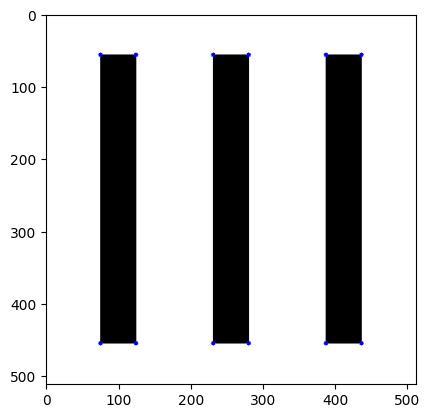

In [51]:
plt.imshow(img)
plt.show()

In [52]:
corners = corners.reshape(12,2)

In [53]:
corners[corners[:,0].argsort()]

array([[ 75, 455],
       [ 75,  56],
       [124, 455],
       [124,  56],
       [231, 455],
       [231,  56],
       [280, 455],
       [280,  56],
       [387, 455],
       [387,  56],
       [436, 455],
       [436,  56]])

In [43]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray, 127, 255, 0)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours

(array([[[  0,   0]],
 
        [[  0, 511]],
 
        [[511, 511]],
 
        [[511,   0]]], dtype=int32),
 array([[[414, 107]],
 
        [[415, 106]],
 
        [[421, 106]],
 
        [[422, 107]],
 
        [[426, 107]],
 
        [[427, 108]],
 
        [[432, 108]],
 
        [[433, 109]],
 
        [[438, 109]],
 
        [[439, 110]],
 
        [[443, 110]],
 
        [[444, 111]],
 
        [[449, 111]],
 
        [[450, 112]],
 
        [[455, 112]],
 
        [[456, 113]],
 
        [[460, 113]],
 
        [[461, 114]],
 
        [[464, 114]],
 
        [[465, 115]],
 
        [[464, 116]],
 
        [[464, 121]],
 
        [[463, 122]],
 
        [[463, 126]],
 
        [[462, 127]],
 
        [[462, 132]],
 
        [[461, 133]],
 
        [[461, 138]],
 
        [[460, 139]],
 
        [[460, 143]],
 
        [[459, 144]],
 
        [[459, 149]],
 
        [[458, 150]],
 
        [[458, 155]],
 
        [[457, 156]],
 
        [[457, 160]],
 
        [[456, 161]],
 
   

In [44]:
# Loop over all contours
count = 0
corner_list = []
for i, cnt in enumerate(contours):
    # Find the approximate contour for each of the contours
    approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4 and hierarchy[0,i,-1] != -1:
        # If the number of vertex points in the approximate contour is 4, it's a rectangle
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw the rectangle
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Get the coordinates of the corners
        corners = np.intp(approx)
        # corner_dict[str(count)] = corners
        corner_dict = {
            "id": count,
            "coordinates": corners.reshape(4,2).tolist()
        }
        corner_list.append(corner_dict)
        count += 1
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

In [45]:
corner_list

[{'id': 0, 'coordinates': [[421, 106], [465, 115], [402, 460], [354, 446]]},
 {'id': 1, 'coordinates': [[262, 78], [311, 90], [249, 433], [200, 421]]},
 {'id': 2, 'coordinates': [[109, 51], [157, 65], [90, 405], [46, 396]]}]

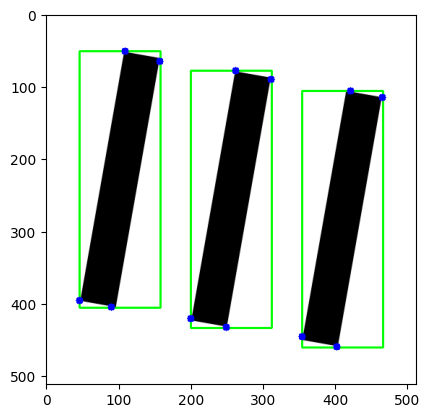

In [46]:
plt.imshow(img)
plt.show()